In [16]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import cv2
import os

In [17]:
def load_images_from_folder(folder, img_size):
    images = []
    for filename in os.listdir(folder):
        img = cv2.resize(cv2.imread(os.path.join(folder,filename)), (img_size, img_size))
        if img is not None:
            images.append(img)
    return images

In [32]:
img_size = 512

glioma_train = load_images_from_folder('./Training/glioma_tumor', img_size)
meningioma_train = load_images_from_folder('./Training/meningioma_tumor', img_size)
pituitary_train = load_images_from_folder('./Training/pituitary_tumor', img_size)
control_train = load_images_from_folder('./Training/no_tumor', img_size)

glioma_test = load_images_from_folder('./Testing/glioma_tumor', img_size)
meningioma_test = load_images_from_folder('./Testing/meningioma_tumor', img_size)
pituitary_test = load_images_from_folder('./Testing/pituitary_tumor', img_size)
control_test = load_images_from_folder('./Testing/no_tumor', img_size)

In [33]:
print('Number of glioma images in training set = ' + str(len(glioma_train)))
print('Number of meningioma images in training set = ' + str(len(meningioma_train)))
print('Number of pituitary images in training set = ' + str(len(pituitary_train)))
print('Number of control images in training set = ' + str(len(control_train)))

print('Number of glioma images in test set = ' + str(len(glioma_test)))
print('Number of meningioma images in test set = ' + str(len(meningioma_test)))
print('Number of pituitary images in test set = ' + str(len(pituitary_test)))
print('Number of control images in test set = ' + str(len(control_test)))

Number of glioma images in training set = 826
Number of meningioma images in training set = 822
Number of pituitary images in training set = 827
Number of control images in training set = 395
Number of glioma images in test set = 100
Number of meningioma images in test set = 115
Number of pituitary images in test set = 74
Number of control images in test set = 105


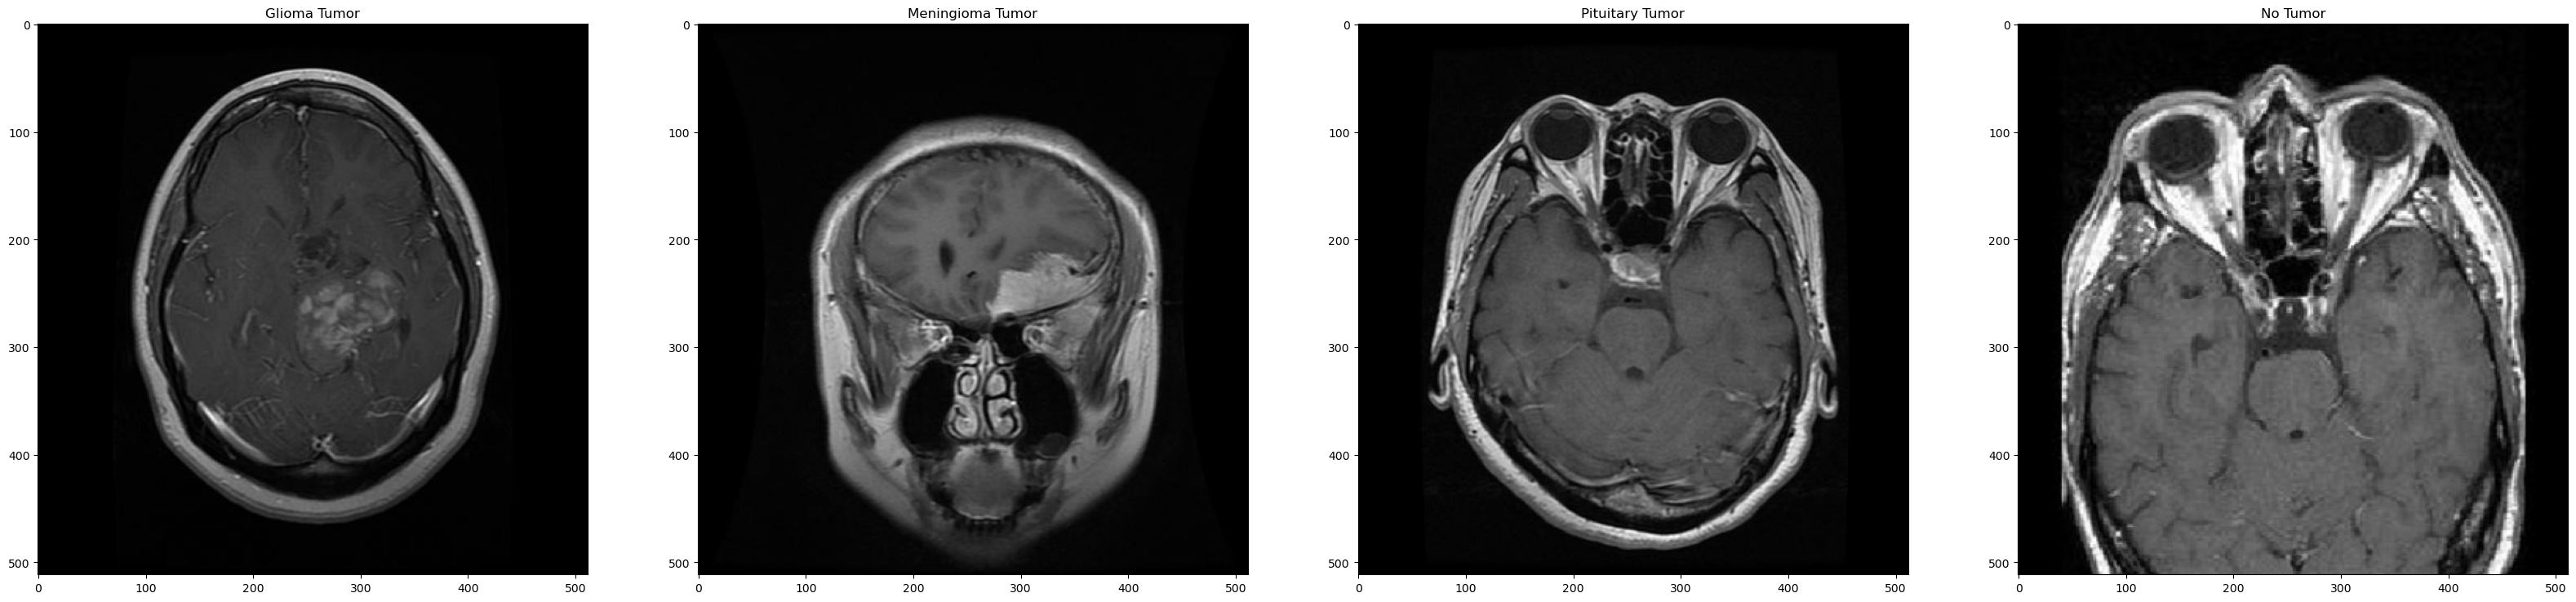

In [31]:
fig, ax = plt.subplots(1, 4, figsize=(40, 40))
ax[0].imshow(glioma_train[0])
ax[0].title.set_text('Glioma Tumor')
ax[1].imshow(meningioma_train[0])
ax[1].title.set_text('Meningioma Tumor')
ax[2].imshow(pituitary_train[0])
ax[2].title.set_text('Pituitary Tumor')
ax[3].imshow(control_train[0])
ax[3].title.set_text('No Tumor')

In [37]:
glioma_train = np.array(glioma_train)
meningioma_train = np.array(meningioma_train)
pituitary_train = np.array(pituitary_train)
control_train = np.array(control_train)

glioma_test = np.array(glioma_test)
meningioma_test = np.array(meningioma_test)
pituitary_test = np.array(pituitary_test)
control_test = np.array(control_test)

In [40]:
print(glioma_train.shape)
print(meningioma_train.shape)
print(pituitary_train.shape)
print(control_train.shape)

(826, 512, 512, 3)
(822, 512, 512, 3)
(827, 512, 512, 3)
(395, 512, 512, 3)


In [44]:
mri_train = np.concatenate((glioma_train, meningioma_train, pituitary_train, control_train), axis=0)
mri_test = np.concatenate((glioma_test, meningioma_test, pituitary_test, control_test), axis=0)

In [45]:
print('Shape of training set = ' + str(mri_train.shape))
print('Shape of test set = ' + str(mri_test.shape))

Shape of training set = (2870, 512, 512, 3)
Shape of test set = (394, 512, 512, 3)
